# 主程序

In [74]:
import tkinter as tk
from tkinter import filedialog, messagebox
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [75]:
def try_func(x_value):
    return x_value

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ntl20\miniconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\ntl20\AppData\Local\Temp\ipykernel_29564\2743402167.py", line 115, in plot_data_and_fit
    ax_poly.scatter(poly_x_values, poly_y_values, color='blue', label='数据点')
  File "c:\Users\ntl20\miniconda3\lib\site-packages\matplotlib\__init__.py", line 1493, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "c:\Users\ntl20\miniconda3\lib\site-packages\matplotlib\axes\_axes.py", line 4655, in scatter
    raise ValueError("x and y must be the same size")
ValueError: x and y must be the same size
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ntl20\miniconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\ntl20\AppData\Local\Temp\ipykernel_29564\2743402167.py", line 115, in plot_data_and_fit
    ax

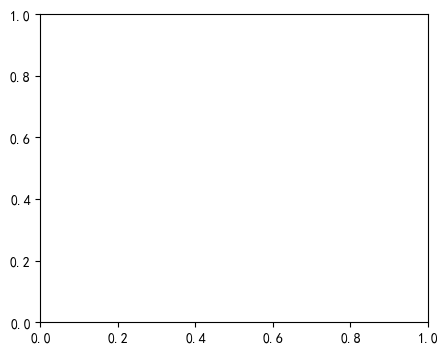

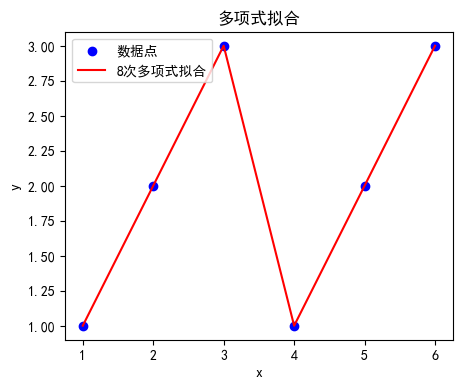

In [94]:
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei' 是黑体的一个常见名称

def calculate_least_squares():
    
    if tab_control.index(tab_control.select()) == 0:
        # 回归直线拟合
        # 获取输入值
        x_values = [float(x) for x in x_entry.get().split(',')]
        y_values = [float(y) for y in y_entry.get().split(',')]

        # 计算最小二乘法
        A = np.vstack([x_values, np.ones(len(x_values))]).T
        m, c = np.linalg.lstsq(A, y_values, rcond=None)[0]

        # 计算残差平方和（RSS）
        rss = np.sum((np.array(y_values) - (m * np.array(x_values) + c)) ** 2)
        
        # 计算总平方和
        total_sum_of_squares = np.sum((np.array(y_values) - np.mean(y_values)) ** 2)

        # 计算确定系数（R-squared）
        r_squared = 1 - (rss / total_sum_of_squares)
        
        # 根据确定系数的大小设置标签颜色和文本
        if 0.7 < r_squared <= 1:
            result_label_text = "拟合良好"
            result_label.config(fg='green')
        elif 0.3 < r_squared <= 0.7:
            result_label_text = "不完全拟合"
            result_label.config(fg='orange')
        else:
            result_label_text = "不拟合"
            result_label.config(fg='red')
        result_label.config(text=f'拟合评价: {result_label_text}, 斜率: {m:.6f}, 截距: {c:.6f}, 确定系数: {r_squared:.3f}, 残差平方和: {rss:.3f}')
    
    if tab_control.index(tab_control.select()) == 1:
        # 多项式拟合
        poly_x_values = [float(x) for x in poly_x_entry.get().split(',')]
        poly_y_values = [float(y) for y in poly_y_entry.get().split(',')]

        # 计算最小二乘法
        degree = int(poly_degree.get())
        p_coeff = np.polyfit(poly_x_values, poly_y_values, degree)

        # 计算拟合曲线
        poly_fit_values = np.polyval(p_coeff, poly_x_values)

        # 计算残差平方和（RSS）
        poly_rss = np.sum((np.array(poly_y_values) - poly_fit_values) ** 2)

        # 计算总平方和
        poly_total_sum_of_squares = np.sum((np.array(poly_y_values) - np.mean(poly_y_values)) ** 2)

        # 计算确定系数（R-squared）
        poly_r_squared = 1 - (poly_rss / poly_total_sum_of_squares)

        # 根据确定系数的大小设置标签颜色和文本
        if 0.7 < poly_r_squared <= 1:
            result_label_text = "拟合良好"
            result_label_poly.config(fg='green')
        elif 0.3 < poly_r_squared <= 0.7:
            result_label_text = "不完全拟合"
            result_label_poly.config(fg='orange')
        else:
            result_label_text = "不拟合"
            result_label_poly.config(fg='red')
        result_label_poly.config(text=f'拟合评价: {result_label_text}, 多项式系数: {p_coeff}, 确定系数: {poly_r_squared:.3f}, 残差平方和: {poly_rss:.3f}')

def plot_data_and_fit(x_label_text='x', y_label_text='y'):

    if tab_control.index(tab_control.select()) == 0:
        # 获取输入值
        x_values = [float(x) for x in x_entry.get().split(',')]
        y_values = [float(y) for y in y_entry.get().split(',')]

        # 清除画布
        ax.cla()

        # 绘制散点
        ax.scatter(x_values, y_values, color='blue', label='数据点')

        # 拟合直线
        A = np.vstack([x_values, np.ones(len(x_values))]).T
        m, c = np.linalg.lstsq(A, y_values, rcond=None)[0]
        ax.plot(x_values, m * np.array(x_values) + c, color='red', label='拟合直线')
        ax.set_xlabel(x_label_text)
        ax.set_ylabel(y_label_text)
        ax.set_title('回归拟合')
        ax.legend()
   
        # 更新画布
        canvas.draw()

        # 计算
        calculate_least_squares()
    
    if tab_control.index(tab_control.select()) == 1:
        # 多项式拟合
        # 获取输入值
        poly_x_values = [float(x) for x in poly_x_entry.get().split(',')]
        poly_y_values = [float(y) for y in poly_y_entry.get().split(',')]

        # 清除画布
        ax_poly.cla()

        # 绘制散点
        ax_poly.scatter(poly_x_values, poly_y_values, color='blue', label='数据点')

        # 拟合多项式
        # 获取 degree 的值，并设置默认值为 1
        degree_str = poly_degree.get()
        if degree_str == "":
            degree = 1
        else:
            degree = int(degree_str)
        p_coeff = np.polyfit(poly_x_values, poly_y_values, degree)
        poly_func = np.poly1d(p_coeff)
        ax_poly.plot(poly_x_values, poly_func(np.array(poly_x_values)), color='red', label=f'{degree}次多项式拟合')
        ax_poly.set_xlabel(x_label_text)
        ax_poly.set_ylabel(y_label_text)
        ax_poly.set_title('多项式拟合')
        ax_poly.legend()

        # 更新画布
        canvas_poly.draw()

        # 计算
        calculate_least_squares()


def load_csv_file():
    # 打开文件选择对话框
    file_path = filedialog.askopenfilename(
        title="选择 CSV 文件",
        filetypes=(("CSV files", "*.csv"), ("All files", "*.*"))
    )

    if file_path:  # 如果用户选择了文件
        # 读取 CSV 文件
        with open(file_path, 'r', encoding='utf-8') as file:
            reader = csv.reader(file)
            data = list(reader)

        # 提取 x 和 y 值
        x_values = data[0][1:]  # 第一行作为 x 值
        y_values = data[1][1:]  # 第二行作为 y 值

        # 提取 x 和 y 轴标签
        x_label_text = data[0][0]  # 第一列作为 x 轴标签
        y_label_text = data[1][0]  # 第二列作为 y 轴标签

        # 更新输入框
        x_entry.delete(0, tk.END)
        x_entry.insert(0, ', '.join(x_values))
        y_entry.delete(0, tk.END)
        y_entry.insert(0, ', '.join(y_values))

        # 更新多项式拟合页的输入框
        poly_x_entry.delete(0, tk.END)
        poly_x_entry.insert(0, ', '.join(x_values))
        poly_y_entry.delete(0, tk.END)
        poly_y_entry.insert(0, ', '.join(y_values))

        # 更新图形的 x 和 y 轴标签
        ax.set_xlabel(x_label_text)
        ax.set_ylabel(y_label_text)
        canvas.draw()

        # 直接启动画图
        plot_data_and_fit(x_label_text, y_label_text)

        # 直接计算得到相关坐标
        calculate_least_squares()

def save_plot():
    # 打开文件保存对话框
    file_path = filedialog.asksaveasfilename(
        defaultextension=".png",
        filetypes=(("PNG files", "*.png"), ("All files", "*.*"))
    )

    if file_path:  # 如果用户选择了文件
        # 保存画布上的图像
        fig.savefig(file_path)
        messagebox.showinfo("保存成功", "图像已成功保存！")

# 创建主窗口
root = tk.Tk()
root.title("回归拟合计算器")
root.geometry("600x600")  # 设置初始窗口大小

# 创建选项卡
tab_control = ttk.Notebook(root)

# 创建回归直线拟合选项卡
linear_tab = ttk.Frame(tab_control)
tab_control.add(linear_tab, text="回归直线拟合")

# 创建多项式拟合选项卡
poly_tab = ttk.Frame(tab_control)
tab_control.add(poly_tab, text="多项式拟合")

# 创建变量来跟踪用户选择的回归类型
regression_type = tk.StringVar()

# 设置默认选中的回归类型
regression_type.set("Linear Regression")


# 创建回归直线拟合的输入组件
x_label = tk.Label(linear_tab, text="输入x值 (用逗号分隔):")
x_label.grid(row=0, column=0)
x_entry = tk.Entry(linear_tab)
x_entry.grid(row=0, column=1)

y_label = tk.Label(linear_tab, text="输入y值 (用逗号分隔):")
y_label.grid(row=1, column=0)
y_entry = tk.Entry(linear_tab)
y_entry.grid(row=1, column=1)

# 创建回归直线拟合结果显示组件
result_label = tk.Label(linear_tab, text="结果：")
result_label.grid(row=3, column=0, columnspan=2)

# 创建回归直线拟合画布组件
fig, ax = plt.subplots(figsize=(5, 4))
canvas = FigureCanvasTkAgg(fig, master=linear_tab)
canvas.get_tk_widget().grid(row=5, column=0, columnspan=3)

# 创建回归直线拟合绘图按钮
plot_button = tk.Button(linear_tab, text="绘制散点和拟合直线", command=plot_data_and_fit)
plot_button.grid(row=2, column=0, columnspan=2)

# 创建加载 CSV 文件的按钮
load_csv_button = tk.Button(linear_tab, text="加载 CSV 文件", command=load_csv_file)
load_csv_button.grid(row=0, column=2, rowspan=2)

# 创建保存图像按钮
save_button = tk.Button(linear_tab, text="保存图像", command=save_plot)
save_button.grid(row=2, column=2)

# 创建多项式拟合的输入组件（与回归直线拟合共享输入框）
poly_degree_label = tk.Label(poly_tab, text="多项式次数:")
poly_degree_label.grid(row=2, column=0)
poly_degree = tk.Entry(poly_tab)
poly_degree.insert(0, "1")  # 设置默认值为1
poly_degree.grid(row=2, column=1)


# 创建多项式拟合结果显示组件
result_label_poly = tk.Label(poly_tab, text="结果：")
result_label_poly.grid(row=4, column=0, columnspan=2)

# 创建多项式拟合画布组件
fig_poly, ax_poly = plt.subplots(figsize=(5, 4))
canvas_poly = FigureCanvasTkAgg(fig_poly, master=poly_tab)
canvas_poly.get_tk_widget().grid(row=5, column=0, columnspan=3)

# 创建多项式拟合绘图按钮
plot_button_poly = tk.Button(poly_tab, text="绘制散点和多项式拟合曲线", command=plot_data_and_fit)
plot_button_poly.grid(row=3, column=0, columnspan=2)

# 创建多项式拟合的输入组件（与回归直线拟合共享输入框）
poly_x_label = tk.Label(poly_tab, text="输入x值 (用逗号分隔):")
poly_x_label.grid(row=0, column=0)
poly_x_entry = tk.Entry(poly_tab)
poly_x_entry.grid(row=0, column=1)

poly_y_label = tk.Label(poly_tab, text="输入y值 (用逗号分隔):")
poly_y_label.grid(row=1, column=0)
poly_y_entry = tk.Entry(poly_tab)
poly_y_entry.grid(row=1, column=1)

# 创建加载 CSV 文件的按钮（与回归直线拟合共享按钮）
load_csv_button_poly = tk.Button(poly_tab, text="加载 CSV 文件", command=load_csv_file)
load_csv_button_poly.grid(row=0, column=2, rowspan=2)

# 创建保存图像按钮（与回归直线拟合共享按钮）
save_button_poly = tk.Button(poly_tab, text="保存图像", command=save_plot)
save_button_poly.grid(row=3, column=2)

# 设置列和行权重，使得窗口大小调整时按钮和输入框可以均匀填充
linear_tab.grid_rowconfigure(2, weight=1)
linear_tab.grid_columnconfigure((0, 1, 2), weight=1)
poly_tab.grid_rowconfigure((0, 1, 2), weight=1)
poly_tab.grid_columnconfigure((0, 1, 2), weight=1)

# 添加选项卡到主窗口
tab_control.pack(expand=1, fill="both")

# 运行主循环
root.mainloop()
